In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sample_cleaned.csv")

print(df.head())

                  time  latitude  longitude  pressure  temperature  salinity
0  2025-03-11 05:49:55  8.983333       68.0       0.3       29.635    34.337
1  2025-03-11 05:49:55  8.983333       68.0       1.1       29.479    34.409
2  2025-03-11 05:49:55  8.983333       68.0       1.9       29.441    34.431
3  2025-03-11 05:49:55  8.983333       68.0       2.9       29.433    34.431
4  2025-03-11 05:49:55  8.983333       68.0       3.8       29.427    34.432


In [5]:
unique_times = df['time'].nunique()
print("Number of unique timestamps:", unique_times)

# Show the first few unique times
print("Unique timestamps:\n", df['time'].unique()[:10])

Number of unique timestamps: 19
Unique timestamps:
 <DatetimeArray>
['2025-03-11 05:49:55', '2025-03-21 01:07:34', '2025-03-30 20:14:32',
 '2025-04-09 15:04:20', '2025-04-19 10:00:33', '2025-04-29 05:02:33',
 '2025-05-08 23:56:53', '2025-05-18 19:13:55', '2025-05-27 23:59:25',
 '2025-06-07 09:14:55']
Length: 10, dtype: datetime64[ns]


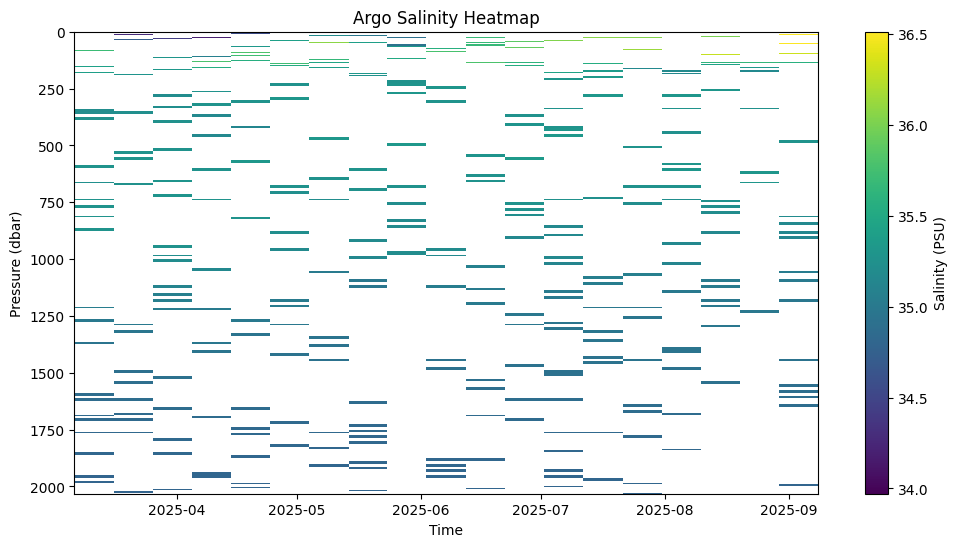

In [6]:
salinity_pivot = df.pivot_table(
    index="pressure",
    columns="time",
    values="salinity"
)

# Plot heatmap
plt.figure(figsize=(12,6))
plt.pcolormesh(
    salinity_pivot.columns, 
    salinity_pivot.index, 
    salinity_pivot.values, 
    shading="auto", cmap="viridis"
)
plt.gca().invert_yaxis()
plt.colorbar(label="Salinity (PSU)")
plt.xlabel("Time")
plt.ylabel("Pressure (dbar)")
plt.title("Argo Salinity Heatmap")
plt.show()